In [1]:
import sys
import os
sys.path.append("../../src")
sys.path.append("../../data")
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython import display
import pylab as pl

from CorInfoMaxBSS import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Sparse_Dictionary_Learning'

In [2]:
image_paths = '../../data/Olshaussen'
X = scipy.io.loadmat(os.path.join(image_paths,'imagepatcheselfwhitened.mat'))['imagepatches']

In [3]:
np.random.seed(0)

lambday = 1 - 1e-3 / 7
lambdae = 1 - 1e-3 / 7
s_dim = 144
x_dim = 144

# Inverse output covariance
By = 1 * np.eye(s_dim)
# Inverse error covariance
Be = 20000 * np.eye(s_dim)

debug_iteration_point = 1000
model = OnlineCorInfoMaxOlshaussen(
    s_dim=s_dim,
    x_dim=x_dim,
    muW=1e-3 / 4,
    lambday=lambday,
    lambdae=lambdae,
    By=By,
    Be=Be,
    neural_OUTPUT_COMP_TOL=1e-6,
    set_ground_truth=False,
)

In [4]:
Wf = model.compute_overall_mapping(return_mapping = True)
# model.plot_receptive_fields(Wf)

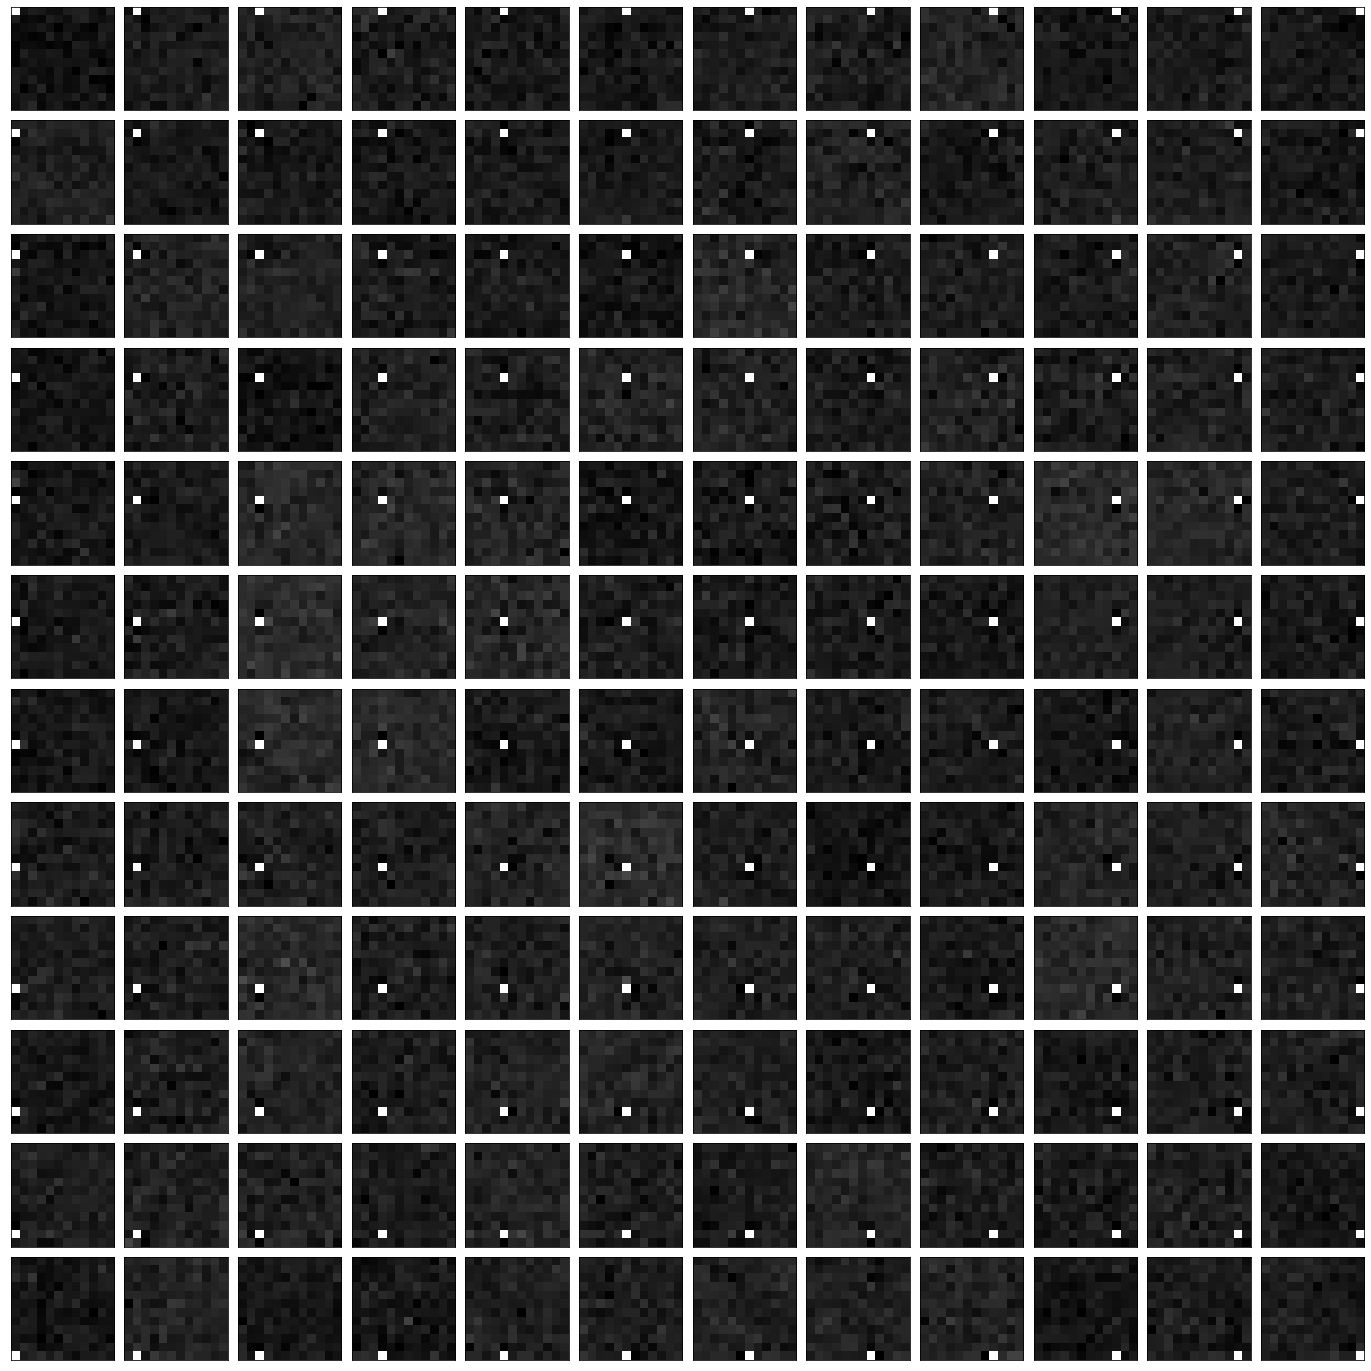

  7%|▋         | 21256/312500 [05:36<29:44, 163.19it/s] 

In [ ]:
model.fit_batch(
        X,
        n_epochs=1,
        case = "sparse", # options: 'sparse' or 'nnsparse'
        neural_dynamic_iterations=500,
        neural_lr_start=1.5,
        neural_lr_stop=1e-8,
        stlambd_lr=3e-2,
        synaptic_lr_rule="constant",
        synaptic_lr_decay_divider=5000,
        neural_loop_lr_rule="divide_by_slow_loop_index",
        neural_lr_decay_multiplier=0.01,
        shuffle=True,
        debug_iteration_point=debug_iteration_point,
        plot_in_jupyter=True,
    )

In [ ]:
Wfend = model.compute_overall_mapping(return_mapping = True)
# Wfend

In [ ]:
np.linalg.norm(Wfend - Wf)

In [ ]:
fig, ax = plt.subplots(12,12, figsize = (20,20))
for l in range(144):
    rf = np.reshape(-Wfend[l,:], (12,12))
    rf = ZeroOneNormalizeData(rf)
    ax[l//12, l%12].imshow(rf, cmap = 'gray')
    ax[l//12, l%12].axes.xaxis.set_visible(False)
    ax[l//12, l%12].axes.yaxis.set_visible(False)
plt.subplots_adjust( right=0.97,\
                    left=0.03,\
                    bottom=0.03,\
                    top=0.97,\
                    wspace=0.1,\
                    hspace=0.1)
# plt.savefig("Sparse2.png")

In [ ]:
# fig, ax = plt.subplots(12,12, figsize = (20,20))
# for l in range(144):
#     rf = np.reshape(-Wfend[l,:], (12,12))
#     rf = ZeroOneNormalizeData(rf)
#     ax[l//12, l%12].imshow(rf, cmap = 'gray')
#     ax[l//12, l%12].axes.xaxis.set_visible(False)
#     ax[l//12, l%12].axes.yaxis.set_visible(False)
# plt.subplots_adjust( right=0.97,\
#                     left=0.03,\
#                     bottom=0.03,\
#                     top=0.97,\
#                     wspace=0.1,\
#                     hspace=0.1)
# # plt.savefig("SparseDictV2.pdf", format = "pdf")